In [221]:
from sklearn.datasets import load_diabetes
from scipy.stats.mstats import normaltest
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np

# Loading and Transformation of the Data

In [222]:
# helper function that handles the imported diabetes data and creates a pandas dataframe
def get_df():
    diabetes = load_diabetes()
    data = diabetes.data
    target = diabetes.target
    target = target.reshape(target.shape[0],-1)
    names = diabetes.feature_names
    
    all_data = np.concatenate([data, target], axis=1)
    all_names = np.concatenate([names, np.array(['TARGET'])], axis=0)

    df = pd.DataFrame(data=all_data, columns=all_names)
    return df

In [223]:
# store the dataframe and show a sample
diabetes_data = get_df()
diabetes_data.sample(n=5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
257,-0.027310,0.050680,-0.055785,0.025315,-0.007073,-0.023547,0.052322,-0.039493,-0.005145,-0.050783,63.0
368,-0.016412,0.050680,0.002417,0.014987,0.021822,-0.010082,-0.024993,0.034309,0.085533,0.081764,123.0
66,-0.009147,0.050680,-0.018062,-0.033214,-0.020832,0.012152,-0.072854,0.071210,0.000271,0.019633,150.0
338,-0.063635,-0.044642,-0.033151,-0.033214,0.001183,0.024051,-0.024993,-0.002592,-0.022512,-0.059067,214.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0
424,0.001751,0.050680,0.011039,-0.019442,-0.016704,-0.003819,-0.047082,0.034309,0.024053,0.023775,111.0
226,-0.103593,0.050680,-0.046085,-0.026328,-0.024960,-0.024800,0.030232,-0.039493,-0.039810,-0.054925,77.0
119,0.016281,-0.044642,-0.047163,-0.002228,-0.019456,-0.042963,0.033914,-0.039493,0.027368,0.027917,200.0
172,0.041708,0.050680,0.071397,0.008101,0.038334,0.015909,-0.017629,0.034309,0.073410,0.085907,295.0
190,0.009016,-0.044642,-0.012673,0.028758,-0.018080,-0.005072,-0.047082,0.034309,0.023375,-0.005220,292.0


In [224]:
diabetes_data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


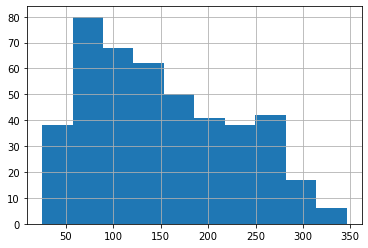

In [225]:
# check the distribution of the target values (normal distibution, even if not necessery, leads to better results)
t = diabetes_data.TARGET
t.hist()

In [226]:
# check the p-value (higher p-value means the distribution is closer to normal)
p = normaltest(t)
p

NormaltestResult(statistic=64.15092254678288, pvalue=1.1743678801847827e-14)

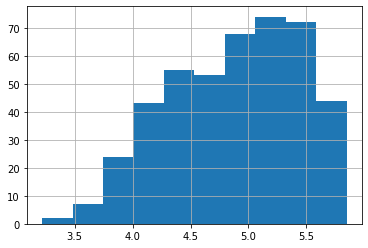

In [227]:
t_transf_log = np.log(t)
t_transf_log.hist()

In [228]:
p_transf_log = normaltest(t_transf_log)
p_transf_log

NormaltestResult(statistic=45.42276946568562, pvalue=1.369528057749736e-10)

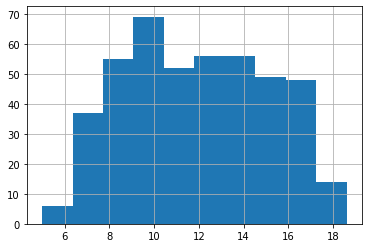

In [229]:
t_transf_sqrt = np.sqrt(t)
t_transf_sqrt.hist()

In [230]:
p_transf_sqrt = normaltest(t_transf_sqrt)
p_transf_sqrt

NormaltestResult(statistic=121.81860737196986, pvalue=3.527162858048417e-27)

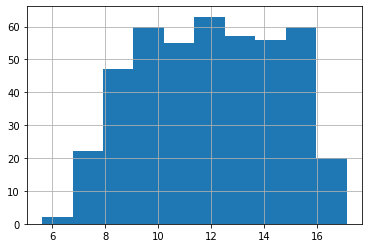

In [231]:
t_transf_boxcox = boxcox(t)
pd.Series(t_transf_boxcox[0]).hist()

In [232]:
p_transf_boxcox = normaltest(t_transf_boxcox[0])
p_transf_boxcox

NormaltestResult(statistic=105.24282055068267, pvalue=1.402206214186965e-23)

In [233]:
highest_p = max(p[1], p_transf_log[1], p_transf_sqrt[1], p_transf_boxcox[1])
highest_p

1.369528057749736e-10

All of the p-values obtained are extremely low, which means they are poorly normalized. Among them, the highest p-value was achieved after the log transformation. That means it gives us the most normalized distribution out of those we tried. We will proceed with the transformed data in order to achieve best results.

# Linear Regression

We use the diabetes dataframe obtained at the beginning.

In [234]:
X = diabetes_data.drop("TARGET", axis=1)
y = diabetes_data["TARGET"]

lin_regr = LinearRegression()

# using polynomial features to get squares and interactions of our data, which will result in more features (columns)
pol_features = PolynomialFeatures(degree=2, include_bias=False)
X_pol_features = pol_features.fit_transform(X)

# splitting the data and use 70% to train the model and 30% to test it 
X_train, X_test, y_train, y_test = train_test_split(X_pol_features, y, test_size=0.3, random_state=42)

# scaling the X_train data
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)

# normalizing y_train by log-transforming it 
y_train_log = np.log(y_train)

# fitting the model and predicting
lin_regr.fit(X_train_standardized, y_train_log)
X_test_standardized = scaler.transform(X_test)
y_prediction_log = lin_regr.predict(X_test_standardized)

In [235]:
diabetes_data["TARGET"].values[:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

In [236]:
y_prediction_log[:10]

array([4.69345165, 5.13364551, 5.03737917, 6.50828787, 4.52846865,
       4.30556299, 5.43378135, 5.42662855, 4.59506321, 4.46740078])

Earlier, we log-transformed y_train values as it provided a more normalized values. Because of that, the predicted values (y_prediction_log) are log-transformed, too. We must invert it using the exponential function. After that we will be able to compare the actual values with the predicted ones. 

In [237]:
predictions = np.exp(y_prediction_log)
predictions[:10]

array([109.22955227, 169.63439681, 154.06570529, 670.67714783,
        92.61662369,  74.11092716, 229.01358993, 227.38134761,
        98.9943924 ,  87.12995888])

# Comparison

In [238]:
diabetes_test = pd.DataFrame({'actual': y_test, 'predicted': predictions})
diabetes_test.sample(n=10)

,actual,predicted
440,220.0,189.665768
9,310.0,185.433776
332,270.0,307.504427
316,220.0,175.206254
437,178.0,202.625881
0,151.0,212.415903
244,187.0,73.689530
55,128.0,59.243015
398,242.0,126.395990
79,113.0,127.953480


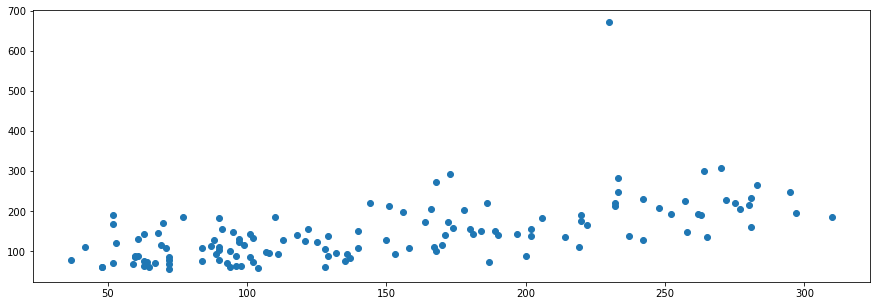

In [239]:
plt.figure(figsize=(15,5))
plt.scatter(y_test, predictions)
x_label='predictions'
y_label='actual values'
plt.show()

In [240]:
r2 = r2_score(predictions, y_test)
r2

0.19173050504412392

As we can see, the linear regression model performance is low - it's R2 score is only 19%. It may lead to a conclusion that the diabetes data are hard to predict. The features used to fit the model are not enough to predict the development of the disease. The relations between them may be not so relevant, significant, and connected to each other, to produce expected behaviour of the human body. Moreover, it can be too unexpected and unpredictable so the results obtained are not satisfying.    

# Linear Regression without log transformation

In [241]:
lr = LinearRegression()
lr.fit(X_train_standardized, y_train)
lr_pred = lr.predict(X_test_standardized)
r2_no_log = r2_score(lr_pred, y_test)
r2_no_log

0.17151688108641772

In [243]:
abs(r2_no_log - r2)

0.020213623957706206

The difference in R2 value with and without log transformation is highly low. It makes it unsignificant and leads to the conclusion that the model's performance is similar regardless of the log transformation.